# Ultimate Technologies Data Science Challenge

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

## Part 1. Exploratory Data Analysis

**Questions**  
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

### < Visualize the user logins >

In [1]:
# Import the packages
%matplotlib notebook

import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

# Set a style for a plot
sns.set(context='notebook', style='ticks', palette='hls')

In [2]:
# Load 'logins.json'
with open('logins.json') as json_file1:
    json_data1 = json.load(json_file1)

# Transform the json into DataFrame
df_logins = pd.DataFrame(json_data1)

print('Raw data:')
df_logins

Raw data:


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
# Check if there is a missing value
print('Missing values:', df_logins.isnull().any())

Missing values: login_time    False
dtype: bool


The json file included one column "login_time". There was no missing value. The log data were from Jan.1st to Apr.13th, and **the expression of the years would not be right.** "1970" is usually the default. I do not know the actual year of these data, but suppose that they are "2019". Change the years into "2019" and convert the column into a datetime object. Also, **the order of the login times was almost ascending, but some of them were incorrect.** See the last two rows of "df_logins". They should have been reversed. However, they are not critical because they will be reordered as datetime objects.

In [4]:
# Change the years into "2019"
df_logins = pd.DataFrame(df_logins['login_time'].str.replace('1970', '2019'))

# Prepare a format string
time_format = '%Y-%m-%d %H:%M:%S'

# Convert the values of the "login_time" into a datetime object
df_logins['login_time'] = pd.to_datetime(df_logins['login_time'], format=time_format)  

# Make a new column 'count' to count the logins later
df_logins['count'] = 1

# Set 'login_time' as the index
df_logins.set_index('login_time', inplace=True)

# Make a new DataFrame having 15-minute time intervals
df_15t = df_logins.resample('15T').sum()
df_15t.head()

,count
login_time,
2019-01-01 20:00:00,2
2019-01-01 20:15:00,6
2019-01-01 20:30:00,9
2019-01-01 20:45:00,7
2019-01-01 21:00:00,1


Visualize the logins at two levels:  
1. **all logins** (from Jan.1st to Apr.13th)  
To see the rough trends.   
  
2. **weeks** (February)  
To see the trends related to the day of week and a day  

<IPython.core.display.Javascript object>


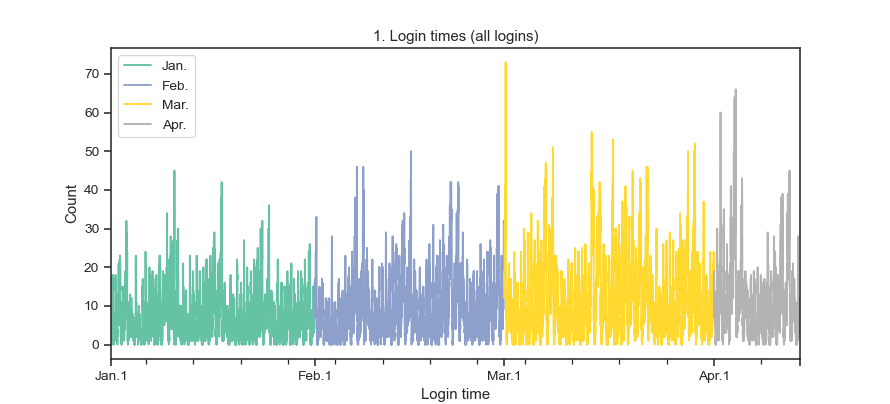

C:\Users\namik\Anaconda3\envs\unit17_2_2\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0, 0.5, 'Count')

In [5]:
# Make a new DataFrame having four columns ('Jan.', 'Feb.', 'Mar.', and 'Apr.')
df_months = pd.DataFrame(index=df_15t.index, columns=['Jan.', 'Feb.', 'Mar.', 'Apr.']) 

# Place each count in each column
for ind in df_months.index:
    if (ind >= datetime.datetime(2019,1,1,0,0,0)) & (ind < datetime.datetime(2019,2,1,0,0,0)):
        df_months.loc[ind, 'Jan.'] = df_15t.loc[ind, 'count']
    elif (ind >= datetime.datetime(2019,2,1,0,0,0)) & (ind < datetime.datetime(2019,3,1,0,0,0)):
        df_months.loc[ind, 'Feb.'] = df_15t.loc[ind, 'count']
    elif (ind >= datetime.datetime(2019,3,1,0,0,0)) & (ind < datetime.datetime(2019,4,1,0,0,0)):
        df_months.loc[ind, 'Mar.'] = df_15t.loc[ind, 'count']
    elif (ind >= datetime.datetime(2019,4,1,0,0,0)):
        df_months.loc[ind, 'Apr.'] = df_15t.loc[ind, 'count']

# Plot the datetime
ax1 = df_months.plot(use_index=True, figsize=(11,5), title='1. Login times (all logins)', colormap='Set2')

# Set the x tick labels
labels = ['Jan.1', 'Feb.1', 'Mar.1', 'Apr.1', '']
ax1.set_xticklabels(labels)

# Set the axis labels
ax1.set_xlabel('Login time')
ax1.set_ylabel('Count')

<IPython.core.display.Javascript object>


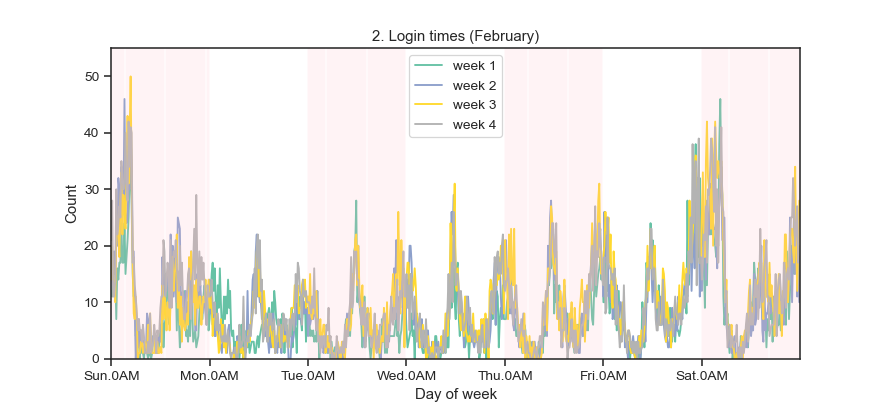

In [6]:
# Extract the data of Feburuary
df_feb = df_15t[(df_15t.index >= datetime.datetime(2019,2,1,0,0,0)) & (df_15t.index < datetime.datetime(2019,3,1,0,0,0))]

# Make a new DataFrame having number indexes. 
# 0 indicates 00:00 (AM), 1 indicates 00:15, ..., and "len(df_feb)/4 - 1" indicates 23:45
df_feb_weeks = pd.DataFrame(index=range(int(len(df_feb)/4)))

# Make four columns holding the login counts. Each column is each week of February.
df_feb_weeks['week 1'] = list(df_feb.iloc[:int(len(df_feb)/4), df_feb.columns.get_loc('count')])
df_feb_weeks['week 2'] = list(df_feb.iloc[int(len(df_feb)/4):int(len(df_feb)/4*2), df_feb.columns.get_loc('count')])
df_feb_weeks['week 3'] = list(df_feb.iloc[int(len(df_feb)/4*2):int(len(df_feb)/4*3), df_feb.columns.get_loc('count')])
df_feb_weeks['week 4'] = list(df_feb.iloc[int(len(df_feb)/4*3):int(len(df_feb)/4*4), df_feb.columns.get_loc('count')])

# Keep the number of indexes of one day because this will be used repeatedly
one_day = int(len(df_feb_weeks)/7)

# Plot the datetime
ax2 = df_feb_weeks.plot(use_index=True, figsize=(11,5), title='2. Login times (February)', colormap='Set2', 
                       xlim=(0,len(df_feb_weeks)), ylim=(0,55), xticks=range(0,len(df_feb_weeks),one_day))

# Set the x tick labels
labels1 = ['Sun.0AM', 'Mon.0AM', 'Tue.0AM', 'Wed.0AM', 'Thu.0AM', 'Fri.0AM', 'Sat.0AM']
ax2.set_xticklabels(labels1)

# Set the x and y axis labels
ax2.set_xlabel('Day of week')
ax2.set_ylabel('Count')

# Add vertical lines
sunday = range(0, one_day)
tuesday = range(one_day*2, one_day*3)
thursday = range(one_day*4, one_day*5)
saturday = range(one_day*6, one_day*7)

line_positions = [sunday, tuesday, thursday, saturday]

for dow in line_positions:
    for i in dow:
        ax2.axvline(i, color='pink', linestyle='-', alpha=0.1) 

According to the first plot, **the number of logins increased from January to March** as a rough trend. **The trace of each month was quite similar to the others.** As you can see in the second plot, **the login time has a cycle by day of week.** The login number was lower on Mondays and increased toward Sundays (Saturday nights). Also, **there was a daily cycle.** The peaks were around 12PM and midnight on weekdays, and around 3AM and in the afternoon on weekends. 